In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset: 
Dua, D. and Graff, C. (2019), UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

### Dataset Pre - Processing :

In [20]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist","class" ]

#Label data
df = pd.read_csv("magic04.data", names = cols)
df.head() # Each row of this dataset is one sample. Our aim is to see if a future sample belongs to class g or h (classification problem)
# Our dataset consist 10 fetures 

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [21]:
df["class"] = (df["class"] == "g").astype(int) # if it's equal to g the 1 otherwise 0

In [ ]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True) #density = True is for normalizing the values
    plt.hist(df[df["class"] == 0][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel("propability")
    plt.xlabel(label)
    plt.legend()
    plt.show()
    

# Train, validation test datasets

In [23]:
#Split the data 
train, valid, test = np.split(df.sample(frac = 1), [int(0.6 * len(df)), int(0.8 * len(df))])

c:\Users\Altair\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [24]:
#Scale the data to have similar value magnitudes(similar sample number to avoid numerical singularities and issues)
def scale_dataset(dataframe, oversample = False):
    
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y) # This says : take more of the smallest class and sample from there so you can increase the size of the smaller class until be closer to equal
    
    data = np.hstack((X, np.reshape(y,(-1,1))))  #take 2 arrays and horizontaly stack them together
    
    return data, X, y

In [25]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)


# -----------------Different ML models For Classification


### kNN (k - neirest neighbours) Model : 
classifying samples based on the distance with the k - neirest samples.


In [26]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [27]:
knn_model = KNeighborsClassifier(n_neighbors= 3)
knn_model.fit(X_train, y_train)  # Fit model

y_pred = knn_model.predict(X_test) # Predict test set values based on the trained model

print(classification_report(y_test, y_pred)) # Print report

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1362
           1       0.86      0.85      0.85      2442

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



### Naive Bayes
Calculating predictions based on naive Bayew theorem. This is based on maximazing a sepcific equation based on propabilities 

In [28]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [29]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1362
           1       0.73      0.89      0.80      2442

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic Regression 
Calculating propabilities using sigmoid functions 
- for only one feature we have simple logistic regresison
- for features > 1 we have multuple logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)


In [31]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1362
           1       0.84      0.82      0.83      2442

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



## Support Vector Machines (SVM)
The SVM model is the best boundary that we can find to separate the two classification categories. 
If three categories the SVM is a plane and 
also the same applies to higher dimensions.

- The margin : Is the prependicular distance between the boundary and the closest sample point.
                Our goal is to maximize the margin lines.

- Important issue with SVM method is the way we it works with outliers. 

- Maximum distance is calculated by minimization of a loss (cost) function

In [32]:
from sklearn.svm import SVC  #this is the support vector classifier 

svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1362
           1       0.89      0.89      0.89      2442

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



# Neural Network

- penalizing pedrictions (changing weights) based on a loss function. 
- TesnorFlow : Open Source 
- Most common library for NN is TensorFlow : Easy definition of the models with high control to the user

In [33]:

import tensorflow as tf 

In [43]:
def plot_history(history):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = ( 10, 4))
    
    ax1.plot(history.history['loss'], label = 'loss')
    ax1.plot(history.history['val_loss'], label = 'val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label ='accuracy')
    ax2.plot(history.history['val_accuracy'], label ='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid('Accuracy')
    
    plt.show()
    

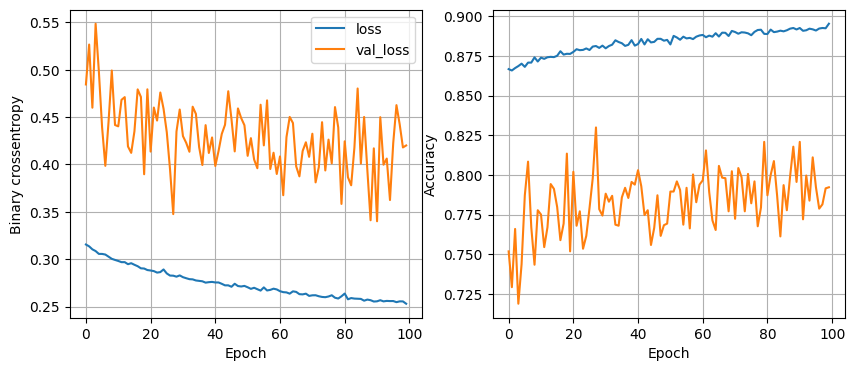

In [44]:
plot_history(history)

In [36]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
]) # Setting the last layer as a sigmoid, which can take only 0 - 1 values, is like we classify our prediction


nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])



In [38]:
#Train the model 

history = nn_model.fit(
    X_train, y_train, 
    epochs = 100, batch_size = 32, validation_split = 0.2, verbose = 0
)

The Main Question in ML is what's the best parameters to use in a model. Let's rerun the same NN model with different parameters and different structure

In [46]:
def train_model(X_train, y_train, num_nodes, dropout_probm ,lr ,batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_probm),  # THis says to the model : randomly choose nodes and don't train them. THis prevent overfitting
        tf.keras.layers.Dense(num_nodes, activation = 'relu'),
        tf.keras.layers.Dropout(dropout_probm),  # THis says to the model : randomly choose nodes and don't train them. THis prevent overfitting
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ]) # Setting the last layer as a sigmoid, which can take only 0 - 1 values, is like we classify our prediction


    nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    
    history = nn_model.fit(
        X_train, y_train, 
        epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0
    )
    
    return nn_model, history


In [ ]:
#Check for multiple parameters and ranke the models based on validation loss. 
least_val_loss = float('inf')
least_loss_model = None

epochs = 100
for num_nodes in [ 16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, 
                                             dropout_prob, lr, batch_size, epochs)
                
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)
                
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model
                
                

In [ ]:
y_pred = least_loss_model.least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))
